## Librerias y Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
## Se accede a Google Drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Se define el dataset info bank y se obtiene el conjunto de datos

infobank_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/Marketing_data.csv")

# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [ ]:
infobank_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# Se visualiza el tipo de varibles del dataset
infobank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Se visualiza distintas estadisticas del dataset
infobank_df.describe()

# El balance medio es $1564 
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Exploración y Visualización

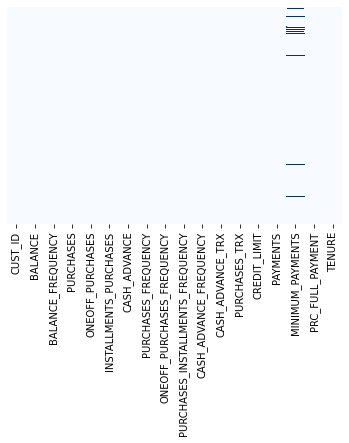

In [ ]:
## Se valida la existencia de valores nulos en los datos
sns.heatmap(infobank_df.isnull(), cbar=False, yticklabels=False, cmap='Blues')

In [ ]:
# Otra forma de validar existencia de valores nulos
data_missing = infobank_df.isnull()
data_missing.sum(axis=0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Se reemplaza los valores nulos de la columna MINIMUM_PAYMENTS por la media de esta columna
infobank_df.loc[(infobank_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = infobank_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Se observa que los valores nulos de la columna MINIMUM_PAYMENTS ya no existen
data_missing = infobank_df.isnull()
data_missing.sum(axis=0)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Se reemplaza los valores nulos de la columna CREDIT_LIMIT por la media de esta columna
infobank_df.loc[(infobank_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = infobank_df['CREDIT_LIMIT'].mean()

In [ ]:
# Se observa que los valores nulos de la columna CREDIT_LIMIT ya no existen
data_missing = infobank_df.isnull()
data_missing.sum(axis=0)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Se valida la existencia de datos duplicados
infobank_df.duplicated().sum()

0

In [ ]:
# Se elimina el ID del cliente ya que no aporta ningun valor
infobank_df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
#La columna CUST_ID ha desaparecido
infobank_df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

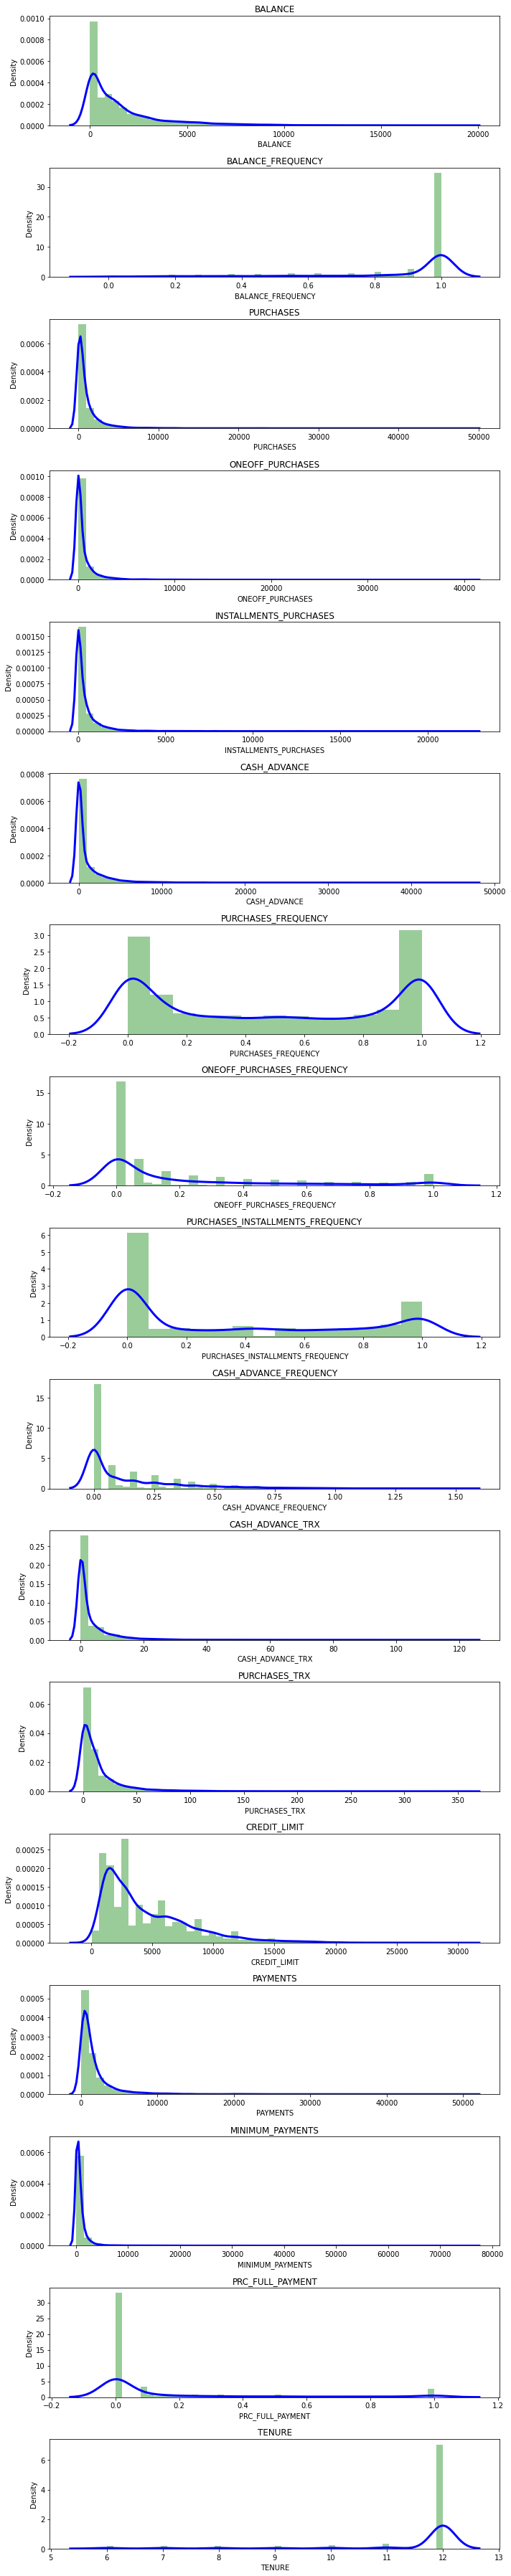

In [ ]:
# Se visualiza grafica de Histograma y ajuste de distribución mediante KDE (kernel density estimation)
n = len(infobank_df.columns)
plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(infobank_df[infobank_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(infobank_df.columns[i])

plt.tight_layout()

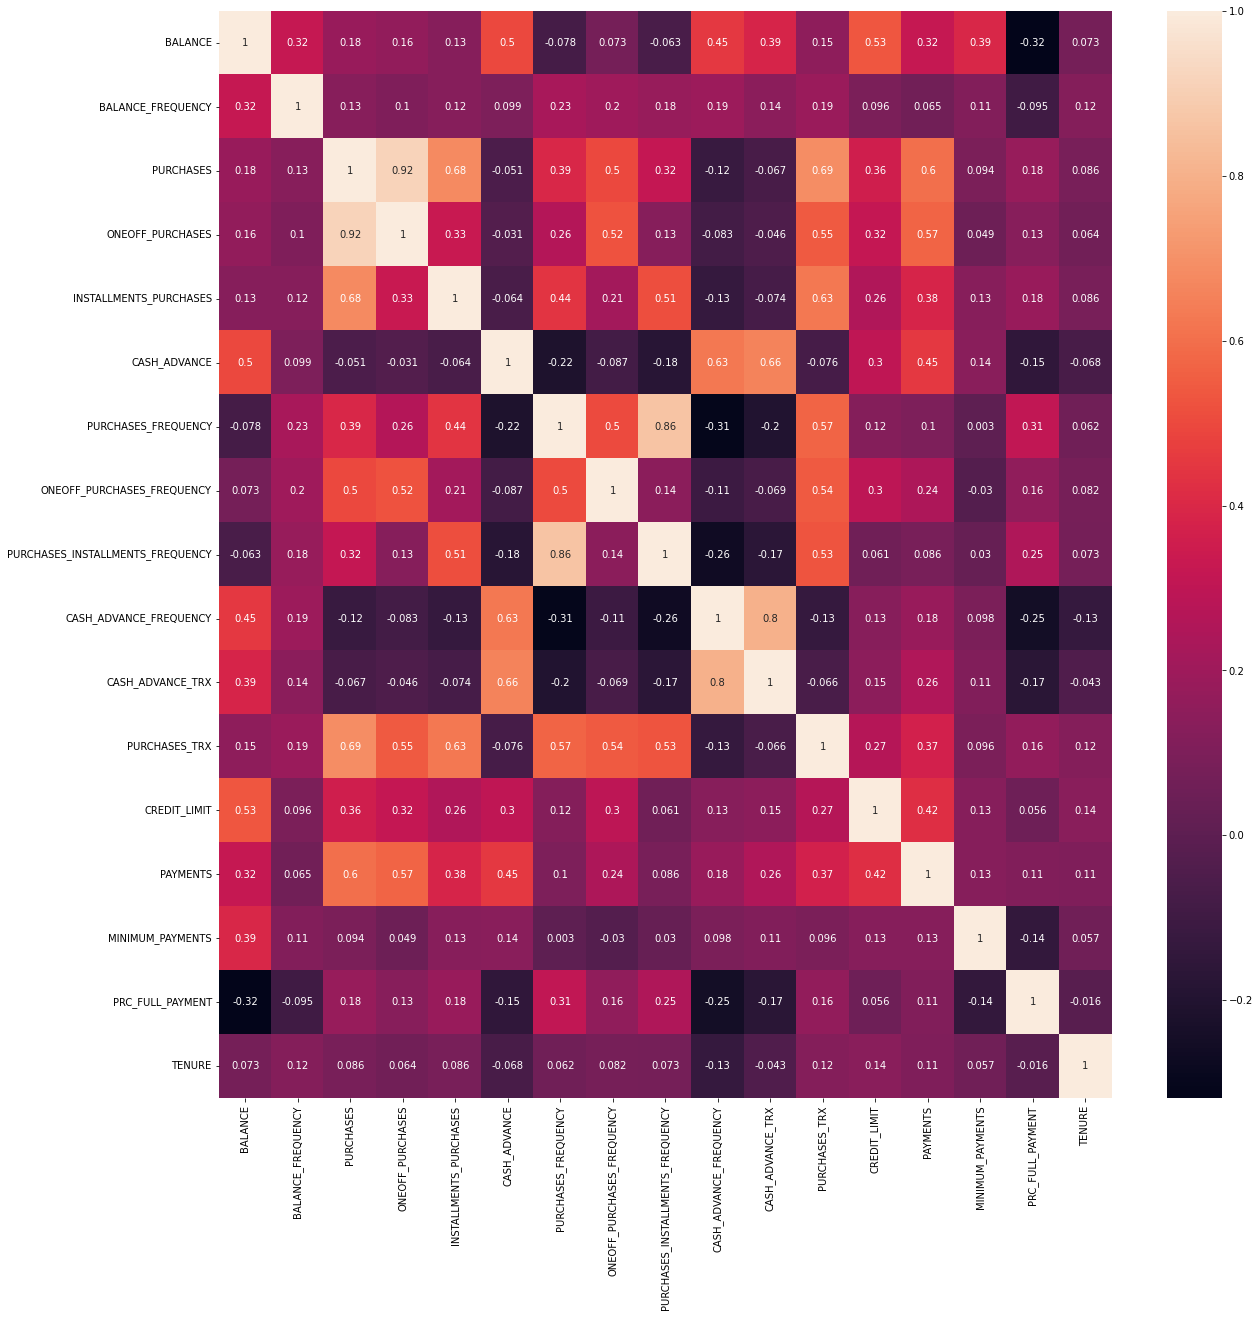

In [ ]:
# Se visualiza matriz de correlaciones
corr = infobank_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)

# Algoritmo de Clustering K-Means

Inicialmente se calcula el número de clusters idoneo para el problema que nos atañe, para ello, se hace uso del metodo del codo, un metodo que permite encontrar el numero de clusters apropiado para un dataset.

In [ ]:
# Se escala el dataset

scaler = StandardScaler()
infobank_scaled = scaler.fit_transform(infobank_df)

In [ ]:
# Se calcula la suma de los cuadrados intra cluster (WCSS) 

scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(infobank_scaled)
    scores_1.append(kmeans.inertia_) #WCSS

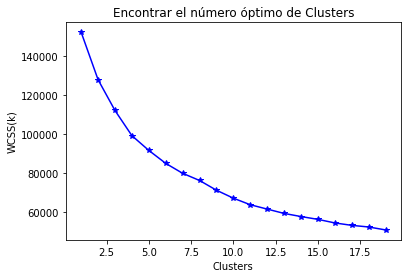

In [ ]:
# se visualiza la grafica para identificar la forma de un codo, 
# por el cual recibe el nombre el metodo del codo

plt.plot(range_values, scores_1, 'b*-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

# En el gráfico se puede observar ver que con 4 clusters se forma el primer codo.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
# Por lo tanto, el número de clusters elegidos es 8.

In [ ]:
# pip install kneed

In [ ]:
# from kneed import KneeLocator
# kl = KneeLocator(
#     range(1, 20), scores_1, curve="convex", direction="decreasing"
# )
# kl.elbow

In [ ]:
# Se aplica el metodo KMeans

kmeans = KMeans(8)
kmeans.fit_transform(infobank_scaled)
labels = kmeans.labels_

In [ ]:
# Se convierte en un dataframe, los centroides de cada columna de los clusters
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[infobank_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.012710,0.404002,-0.357138,-0.241745,-0.400209,-0.093727,-0.853189,-0.394741,-0.754842,0.103941,-0.027467,-0.481828,-0.302974,-0.249432,-0.011635,-0.455386,0.273280
1,-0.701257,-2.137189,-0.310069,-0.234784,-0.301700,-0.322766,-0.553110,-0.441424,-0.438831,-0.521893,-0.376564,-0.418536,-0.176209,-0.202135,-0.257092,0.287615,0.201638
2,-0.359210,0.334032,-0.033986,-0.241761,0.363605,-0.362964,0.993129,-0.381995,1.204903,-0.473024,-0.359987,0.192127,-0.259520,-0.214710,-0.030012,0.309339,0.256413
3,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
4,1.044069,0.464401,2.531970,1.837424,2.611177,-0.141149,1.163601,1.571795,1.270158,-0.280397,-0.142502,3.142724,1.310056,1.477173,0.564717,0.264636,0.337262
5,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
6,-0.133034,0.400605,0.543279,0.672600,0.048708,-0.331239,0.981492,1.906804,0.174287,-0.412879,-0.329926,0.622960,0.434279,0.146682,-0.158030,0.444145,0.268773
7,1.687342,0.392882,-0.216930,-0.155094,-0.228062,2.010375,-0.470110,-0.207420,-0.410772,1.914120,1.920095,-0.265286,1.030401,0.820381,0.552817,-0.389946,0.071038


In [ ]:
# Para entender mejor los valores, se realiza la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[infobank_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1590.930359,0.972975,240.174235,191.190628,49.163367,782.321047,0.147925,0.084699,0.064444,0.155944,3.061388,2.733382,3392.105582,1011.062895,837.092805,0.020522,11.883037
1,104.867851,0.370990,340.737061,202.743395,138.244341,302.015981,0.268361,0.070772,0.190035,0.030708,0.679054,4.306588,3853.327233,1147.983995,265.065556,0.237837,11.787162
2,816.808757,0.956400,930.592246,191.163137,739.871108,217.717830,0.888941,0.088501,0.843297,0.040487,0.792182,19.485403,3550.207918,1111.578851,794.263870,0.244191,11.860465
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
4,3737.616647,0.987283,6412.797493,3642.184387,2772.322507,682.876054,0.957360,0.671355,0.869231,0.079034,2.276353,92.826211,9260.968661,6009.414573,2180.256092,0.231116,11.968661
5,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372
6,1287.576021,0.972170,2163.929465,1708.815606,455.113859,284.247254,0.884271,0.771294,0.433704,0.052523,0.997326,30.194296,6074.534111,2157.774800,495.924832,0.283619,11.877005
7,5076.534369,0.970341,539.730619,335.012821,204.834392,5194.721667,0.301673,0.140580,0.201186,0.518179,16.352064,8.115826,8243.468515,4108.065221,2152.523773,0.039662,11.612385


In [ ]:
# Se concatenan las etiquetas de los clusters con el dataset riginal 
# para identificar a que cluster pertenece cada cliente del banco

infobank_df_cluster = pd.concat([infobank_df, pd.DataFrame({'cluster': labels})], axis = 1)
infobank_df_cluster.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


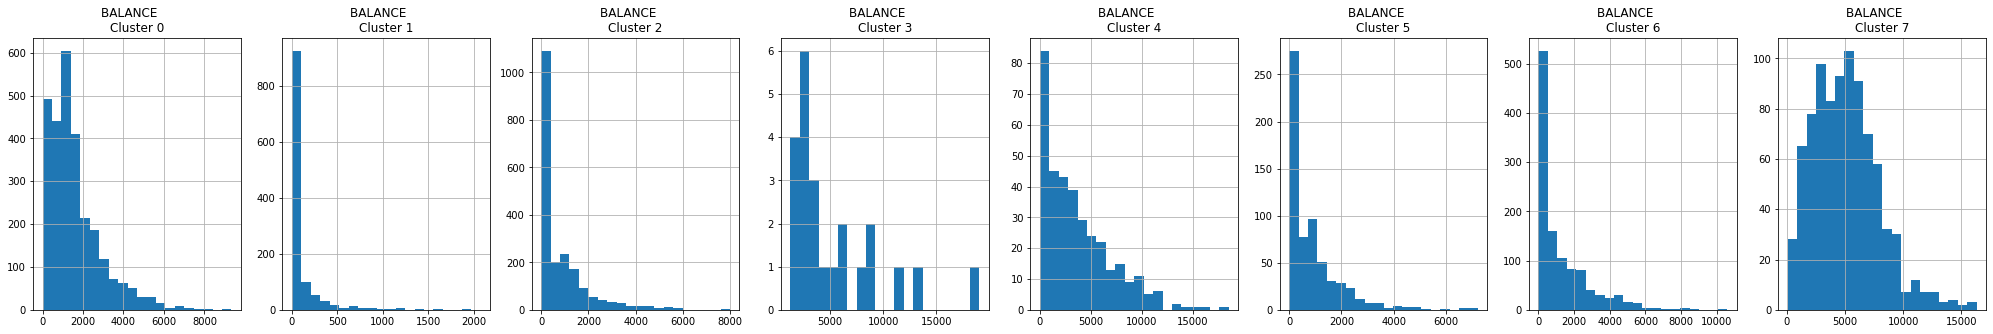

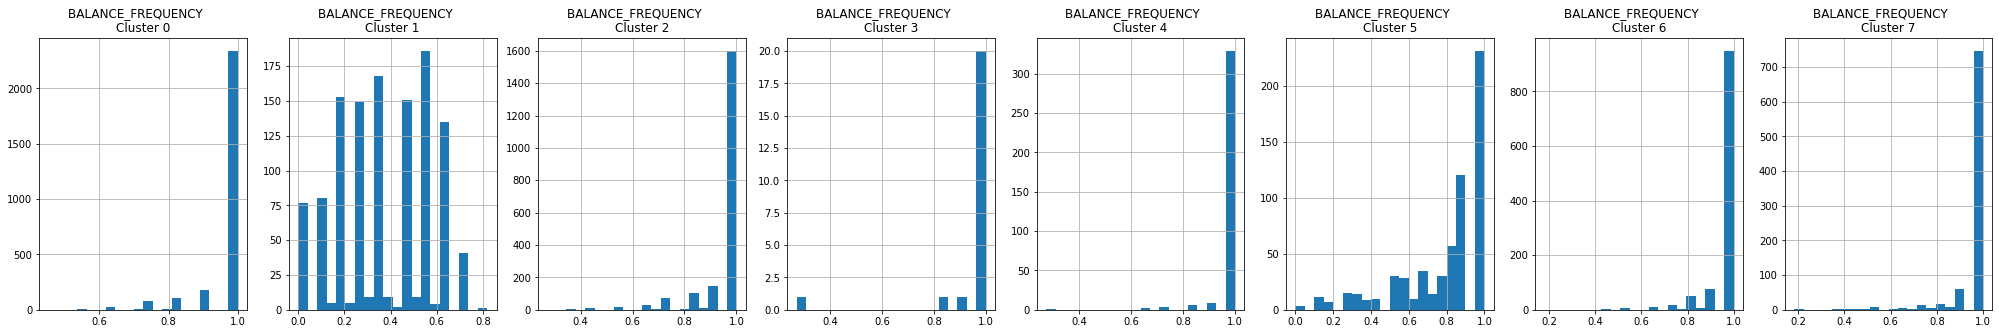

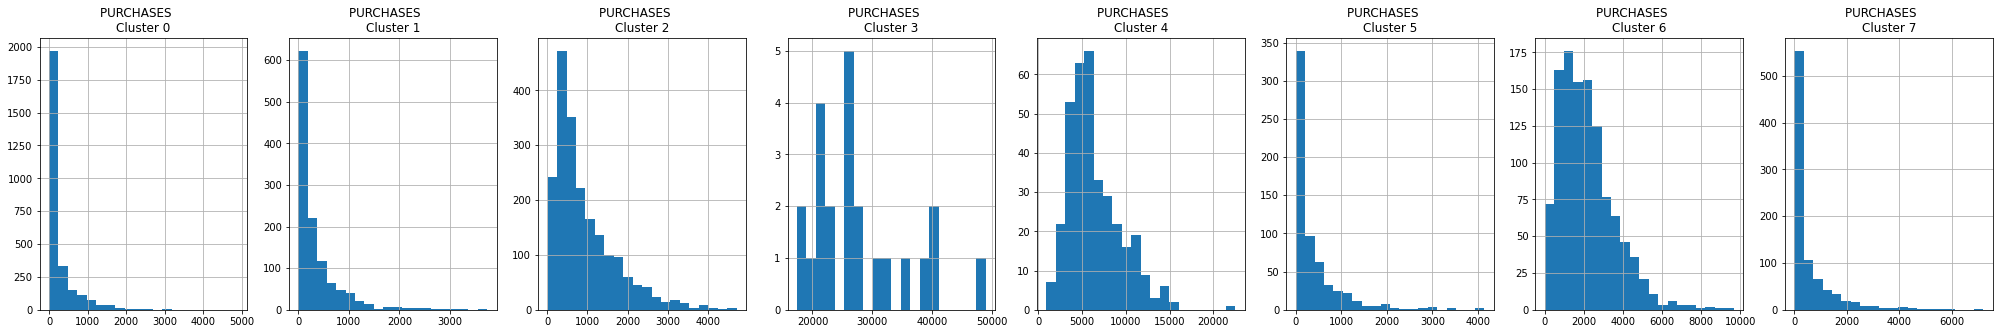

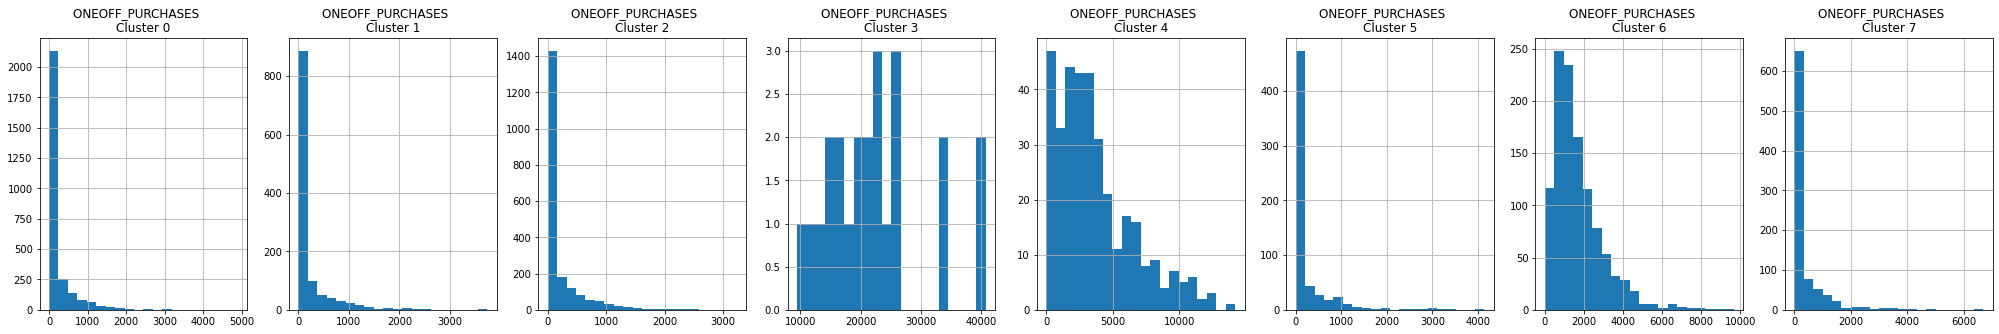

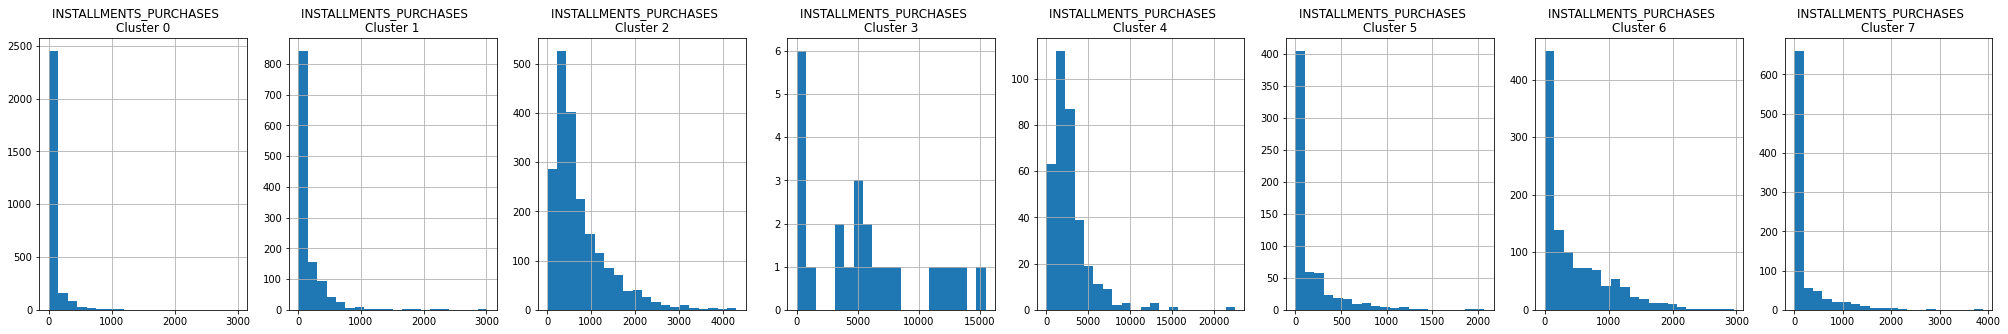

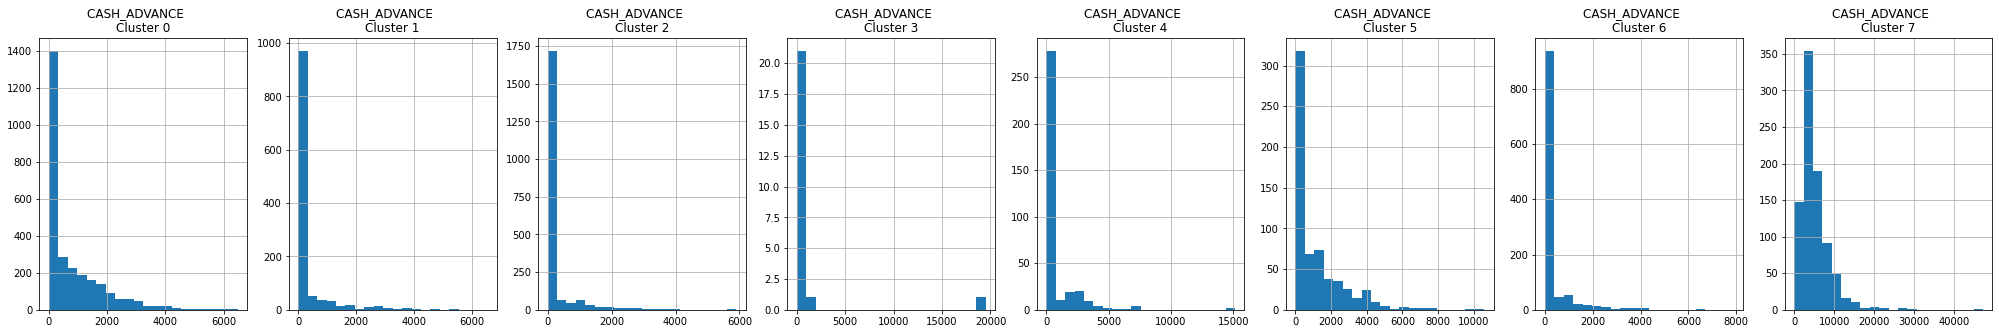

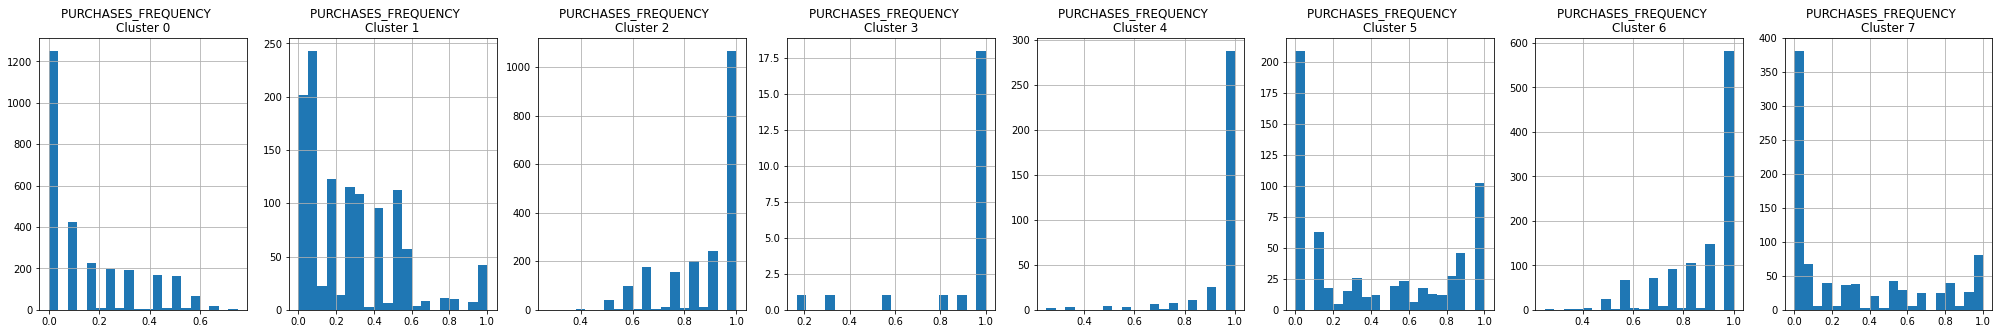

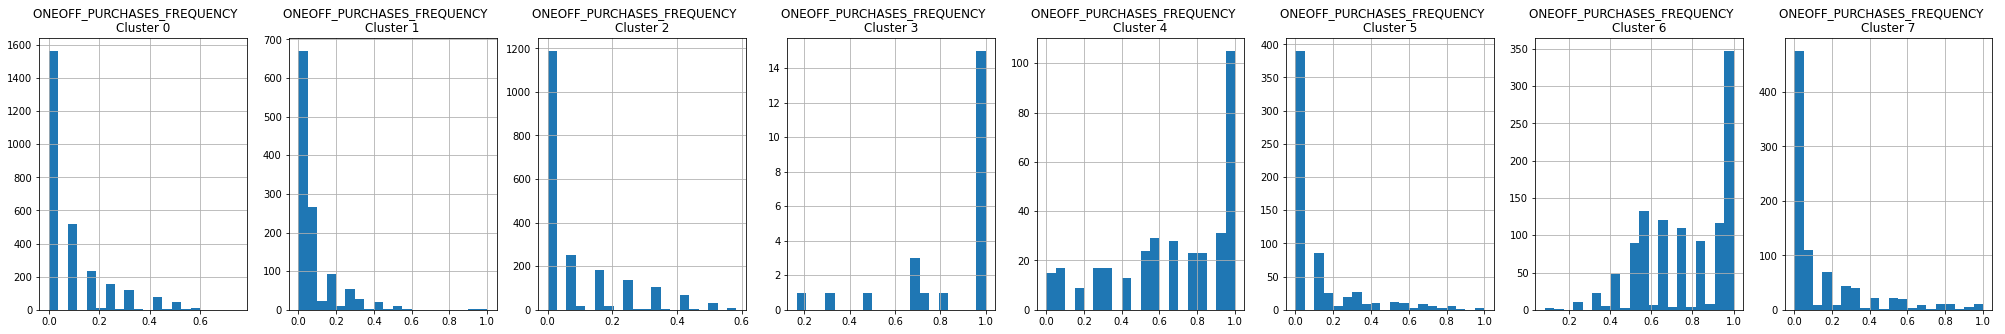

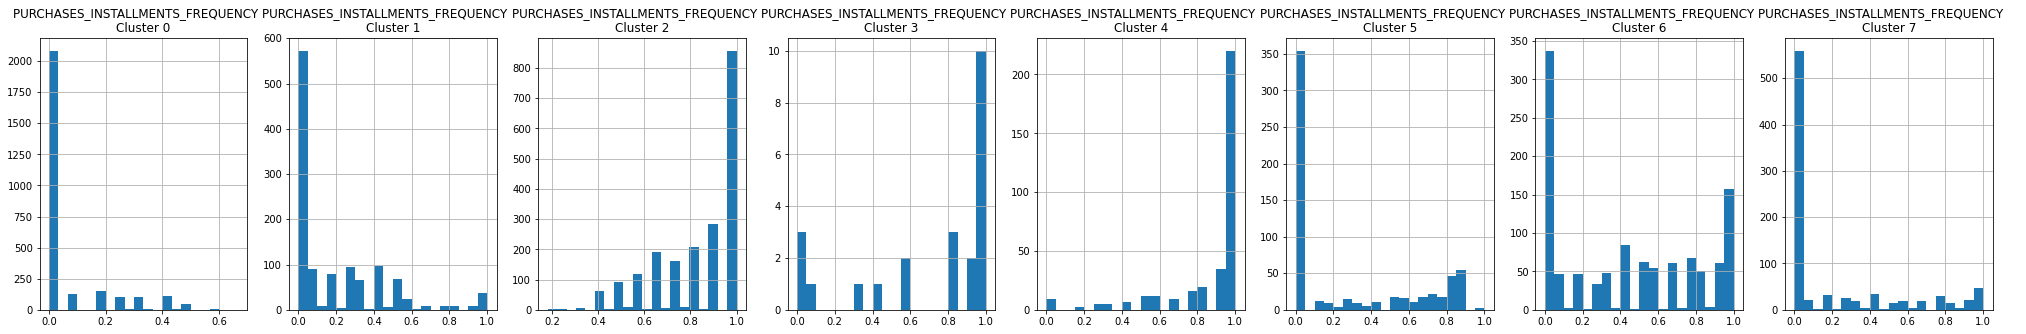

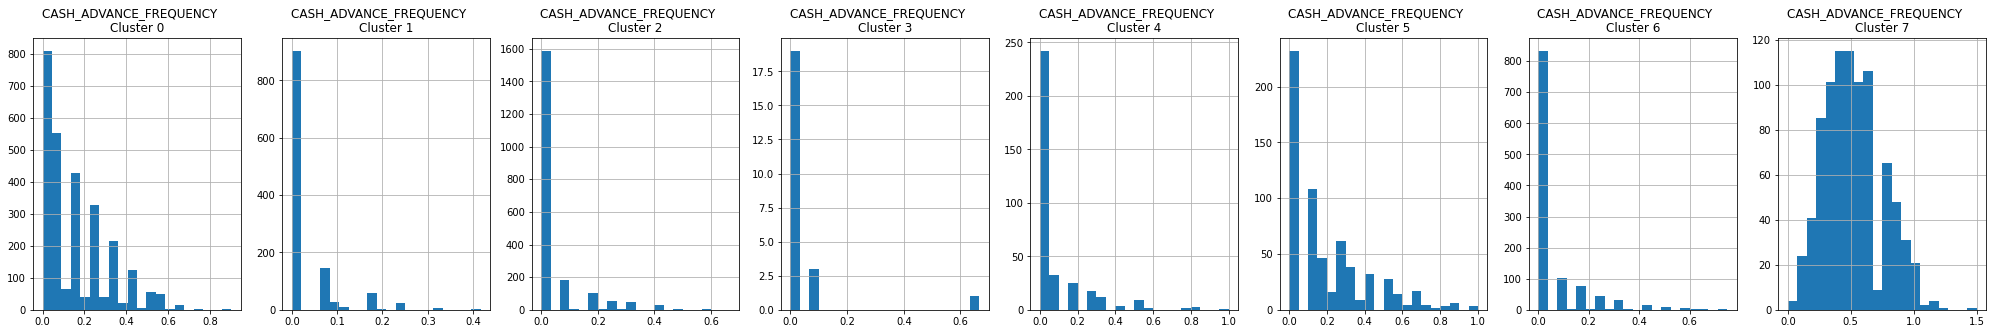

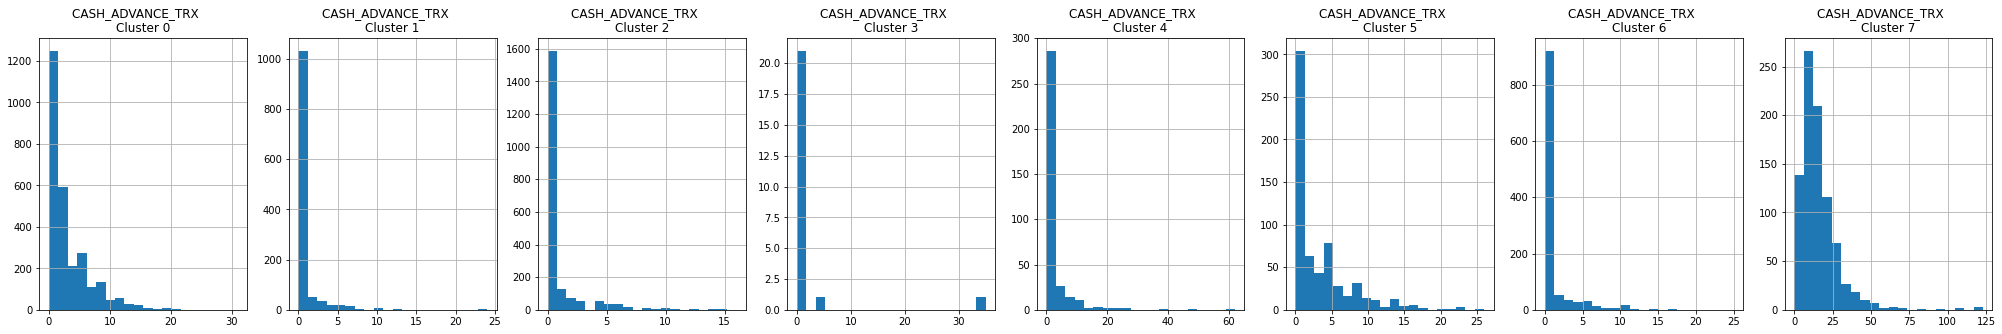

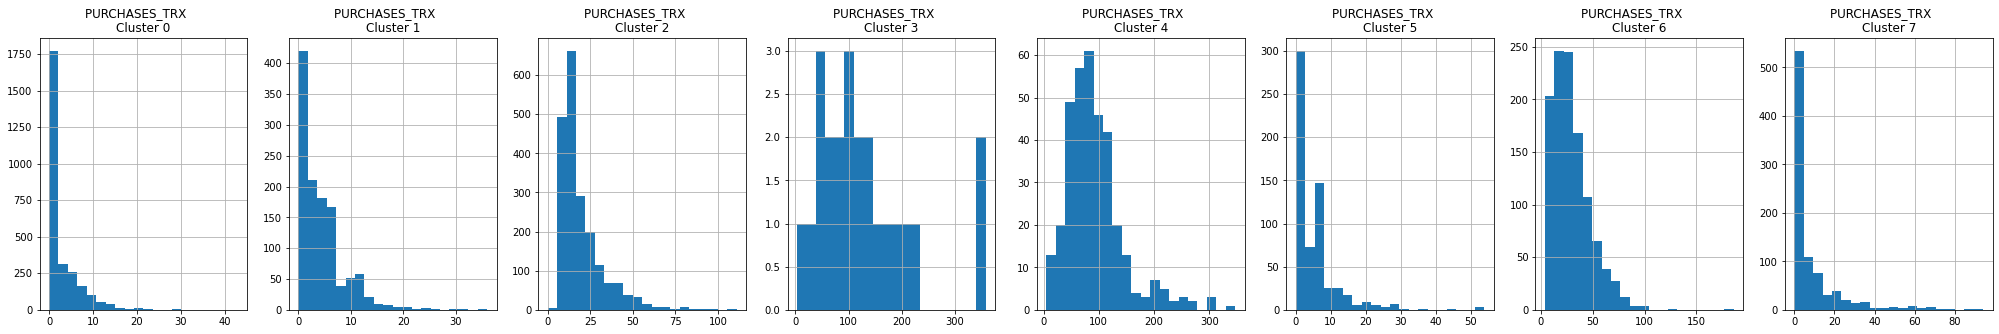

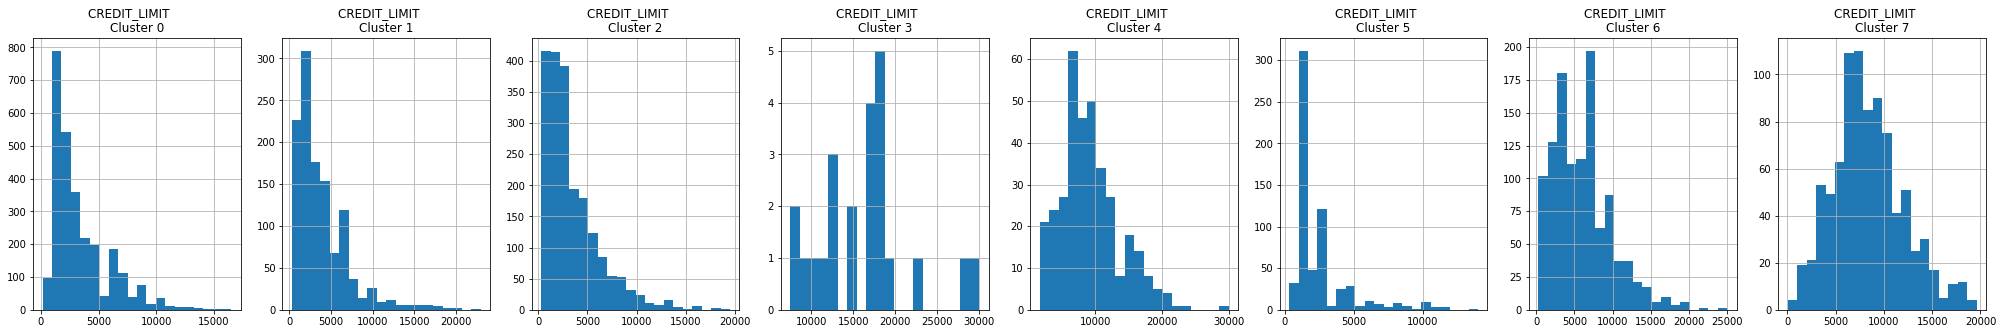

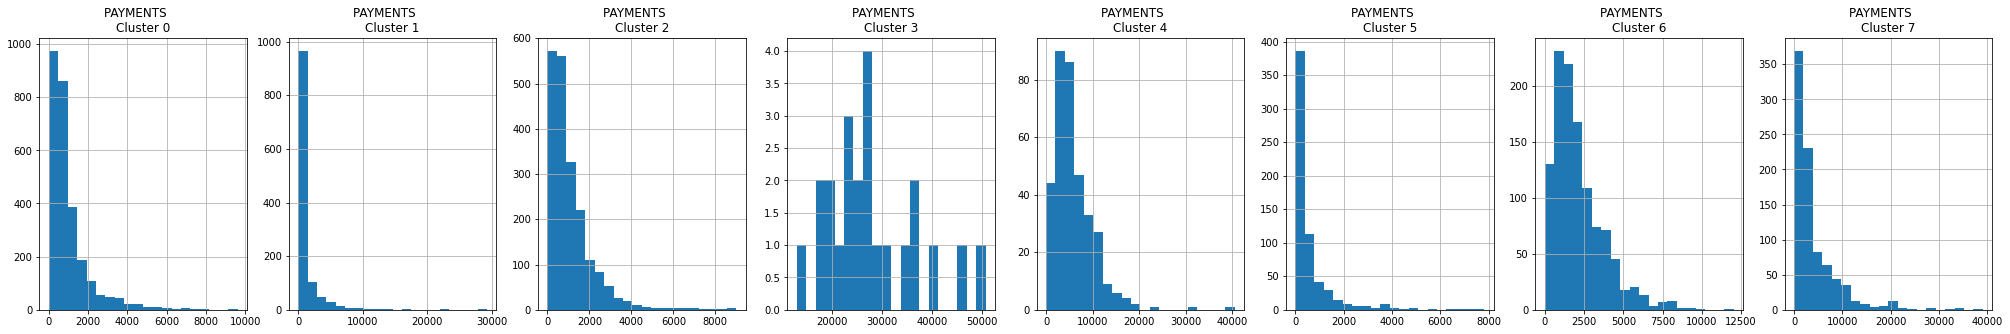

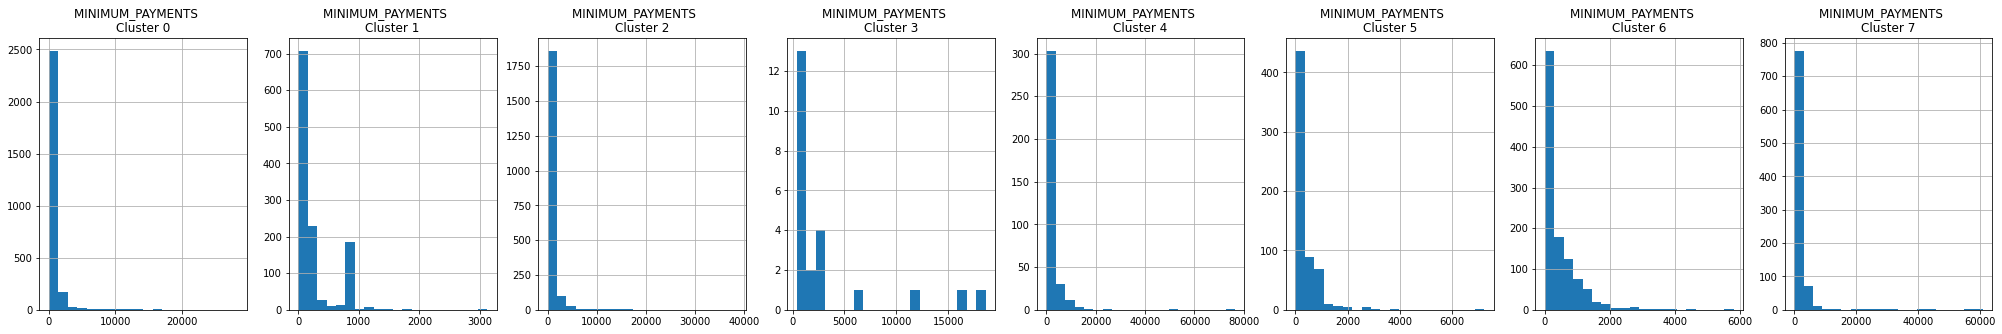

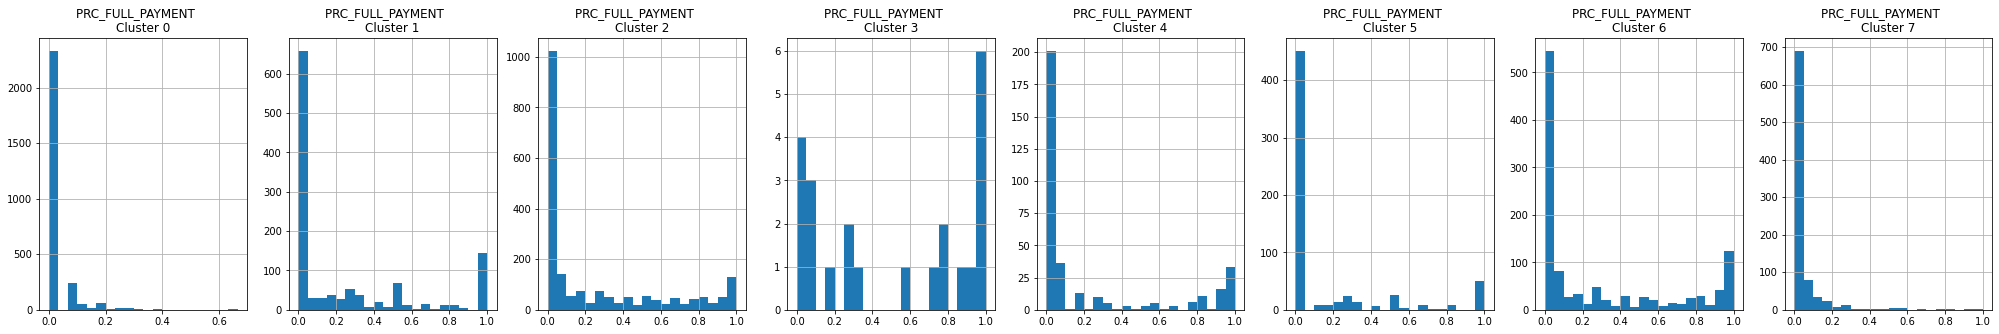

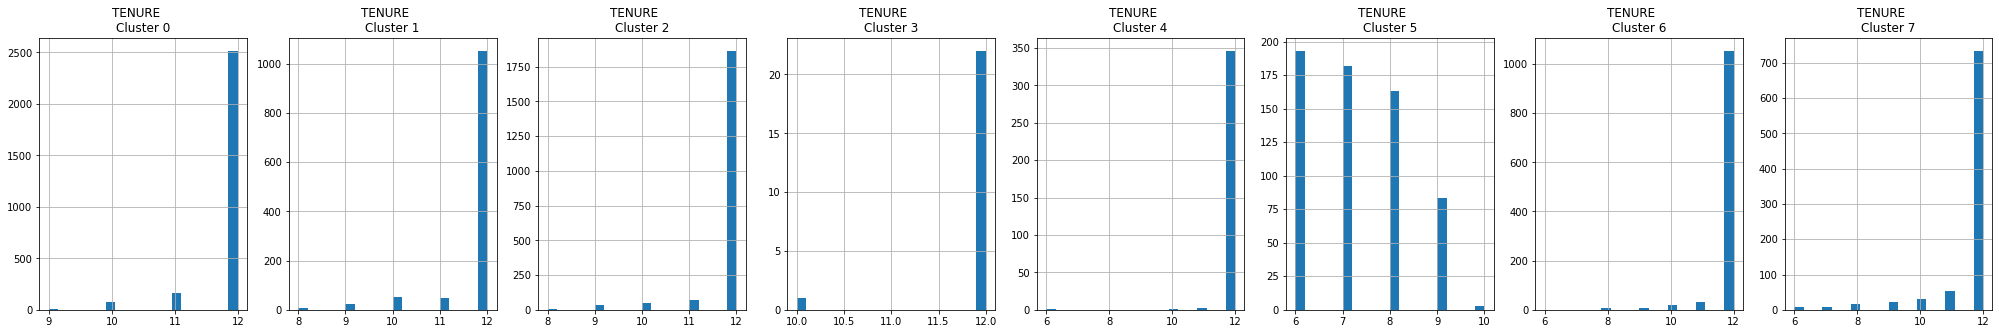

In [ ]:
# Se visualizan histogramas para cada cluster 
for i in infobank_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = infobank_df_cluster[infobank_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()


In [ ]:
# Se utiliza el algoritmo PCA para lograr una reducción de dimensionalidad,
# calcular los componentes principales y visualizar los resultados

pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(infobank_scaled)
principal_comp

array([[-1.68221788, -1.0764501 ],
       [-1.13829331,  2.50646949],
       [ 0.9696795 , -0.38352916],
       ...,
       [-0.92620153, -1.81078192],
       [-2.33654919, -0.65795795],
       [-0.55642773, -0.40046745]])

In [ ]:
# Se crea un DataFrame con los componenetes principales

pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682218,-1.076450
1,-1.138293,2.506469
2,0.969680,-0.383529
3,-0.873624,0.043164
4,-1.599432,-0.688579


In [ ]:
# Se concatenan las etiquetas de los clusters con el dataframe de las componentes principales

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.682218,-1.076450,0
1,-1.138293,2.506469,7
2,0.969680,-0.383529,6
3,-0.873624,0.043164,0
4,-1.599432,-0.688579,0


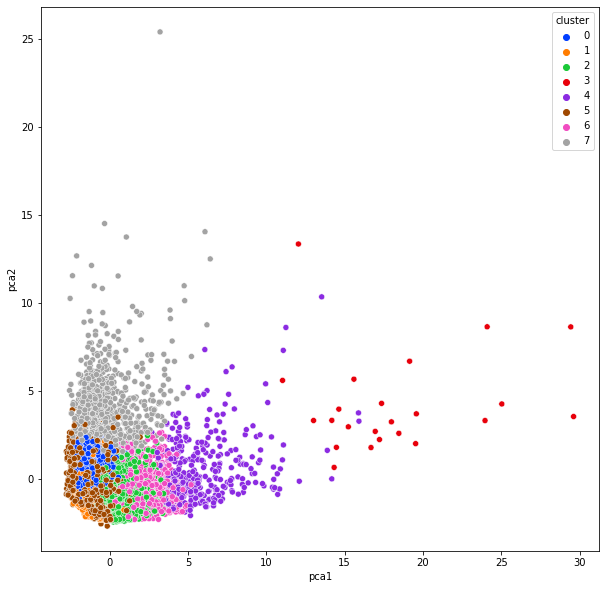

In [ ]:
# Se visualizan los componentes principales

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette=sns.color_palette('bright', pca_df['cluster'].unique().shape[0]))
plt.show()

## Aplicación de Autoencoders

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape = (17, ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

#Se define la arquitectura del autoencoder

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

# sgd = keras.optimizers.SGD(learning_rate=0.028)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Se visualiza un resumen del modelo de autoencoder
autoencoder.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 17)]              0         
_________________________________________________________________
dense_160 (Dense)            (None, 7)                 126       
_________________________________________________________________
dense_161 (Dense)            (None, 500)               4000      
_________________________________________________________________
dense_162 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_163 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
dense_164 (Dense)            (None, 8)                 16008     
_________________________________________________________________
dense_165 (Dense)            (None, 2000)              180

In [ ]:
# Entrenamiento Autoencoder
autoencoder.fit(infobank_scaled, infobank_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 51ms/step - loss: 0.6617
Epoch 2/25
70/70 [==============================] - 3s 49ms/step - loss: 0.3749
Epoch 3/25
70/70 [==============================] - 3s 49ms/step - loss: 0.2596
Epoch 4/25
70/70 [==============================] - 3s 49ms/step - loss: 0.2193
Epoch 5/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1797
Epoch 6/25
70/70 [==============================] - 4s 50ms/step - loss: 0.1544
Epoch 7/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1401
Epoch 8/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1346
Epoch 9/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1215
Epoch 10/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1104
Epoch 11/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1075
Epoch 12/25
70/70 [==============================] - 3s 49ms/step - loss: 0.1068
Epoch 13/25
70/70 [==================

In [ ]:
# Se guardan los pesos del autoencoder para poder 
# usarlos en cualquier momento, posteriormente

autoencoder.save_weights('autoencoder.h5')

In [ ]:
# Con la capa encoder se obtiene un conjunto reducido de caracteristicas comprimidas
# a partir de las 17 iniciales

pred = encoder.predict(infobank_scaled)

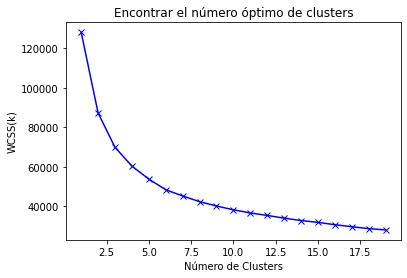

In [ ]:
#Se calculan los datos para el metodo del codo,
# Y se visualiza en la gráfica

scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

# Se puede observar en la grafica que el numero de cluster optimos es 4

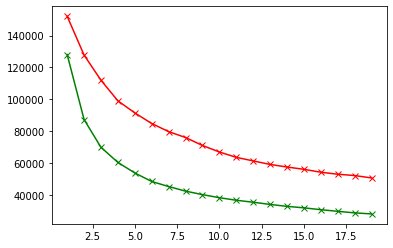

In [ ]:
# Graficas del metodo del codo con KMeans y Encoder
plt.plot(range_values, scores_1, 'bx-', color = "r")
plt.plot(range_values, scores_2, 'bx-', color = "g")

In [ ]:
# Se aplica el algoritmo KMeans para 4 clusters, con
# el conjunto de datos reducidos

kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [ ]:
# Se crea un dataframe con ell conjunto de datos iniciales y la etiqueta correspondiente a cada cluster
# para cada uno de los registros. 

df_cluster_dr = pd.concat([infobank_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
# Se realiza una reducción de dimensionalidad con el algoritmo PCA,
# para obtener las componentes principales y visualizar los resultados

pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-2.442601,0.036626
1,1.246254,2.640400
2,-0.811921,-0.592960
3,-0.926224,0.648462
4,-2.249905,0.255801


In [ ]:
# pca_df["cluster"] = labels
# pca_df
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-2.442601,0.036626,0
1,1.246254,2.640400,2
2,-0.811921,-0.592960,0
3,-0.926224,0.648462,0
4,-2.249905,0.255801,0
...,...,...,...
8945,-0.503842,-1.162008,0
8946,-1.393810,-0.559765,0
8947,-1.911999,-0.561448,0
8948,-1.820165,0.408322,0


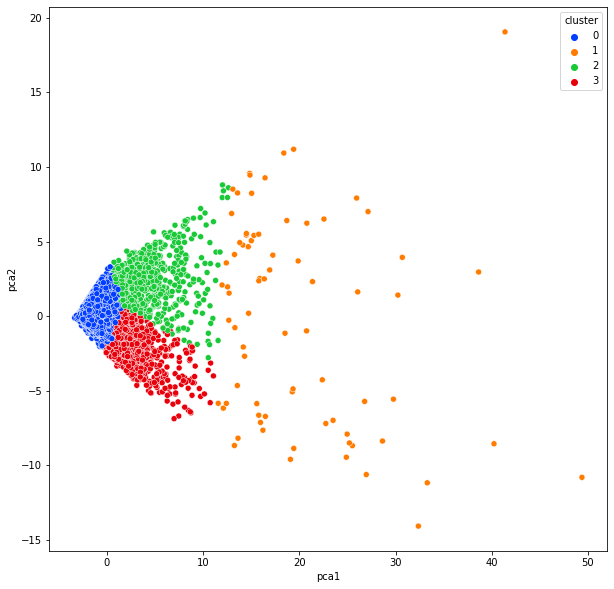

In [ ]:
# A través del analisis de componenetes principales se pueden observar el conjuntos de los 4 cluster identificados

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=sns.color_palette('bright', pca_df['cluster'].unique().shape[0]))
plt.show()